### Machine Vision Lab 6

**22BAI1037 - Gorav Jhabakh**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def displayImg(img,title):
    plt.figure(figsize=(5,5))
    plt.title(title)
    plt.axis('off')
    plt.imshow(img, cmap='grey')

def displayAll(imgs,names,l):
    plt.figure(figsize=(20,20))
    for i in range(l):
        plt.subplot(1,l,i+1)
        plt.axis("off")
        plt.title(names[i])
        plt.imshow(imgs[i],cmap='gray')

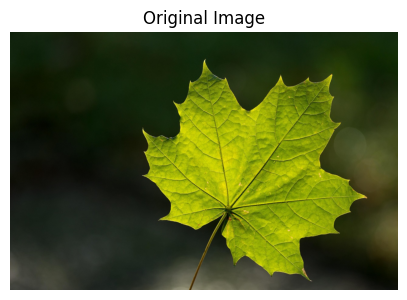

In [14]:
img = cv2.imread('leaf.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(1200,800))
displayImg(img,'Original Image')

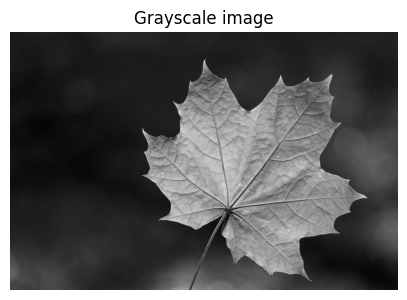

In [15]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
displayImg(gray_img,'Grayscale image')

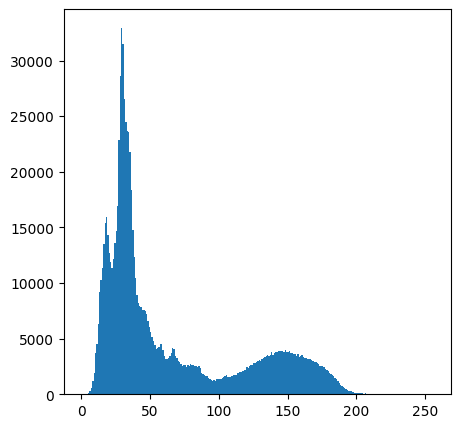

In [16]:
plt.figure(figsize=(5,5))
plt.hist(gray_img.ravel(),range=[0,256],bins=256)
plt.show()

**Global Thresholding**

1. Manual threshold
2. OTSU thresholding

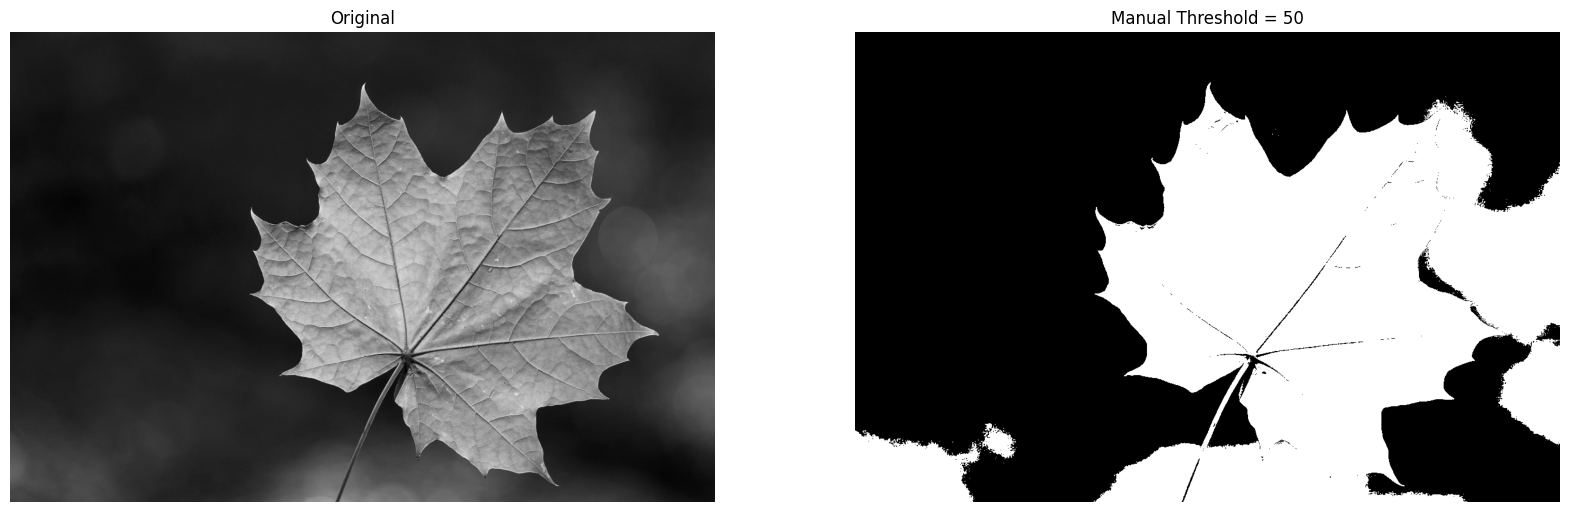

In [ ]:
def manualThresh(img,thresh):
    _,thresh_img = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)
    return thresh_img

thresh = 50 
thresh_img1 = manualThresh(gray_img,thresh)
displayAll([gray_img,thresh_img1],['Original','Manual Threshold = '+str(thresh)],2)


otsu's threshold:  89.0


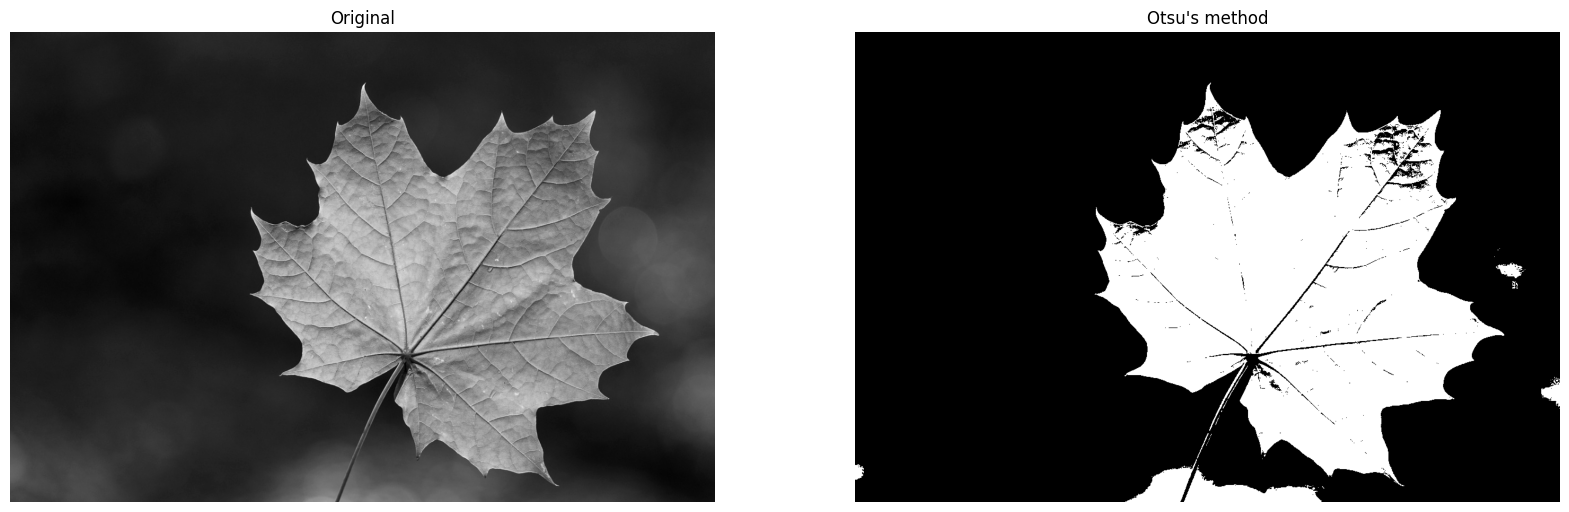

In [21]:
def otsu(img):
    thresh,otsu_img = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return [thresh,otsu_img]

res = otsu(gray_img)
print('otsu\'s threshold: ',res[0])
displayAll([gray_img,res[1]],['Original','Otsu\'s method'],2)

**Local Thresholding**

1. Adaptive Mean
2. Adaptive Gaussian

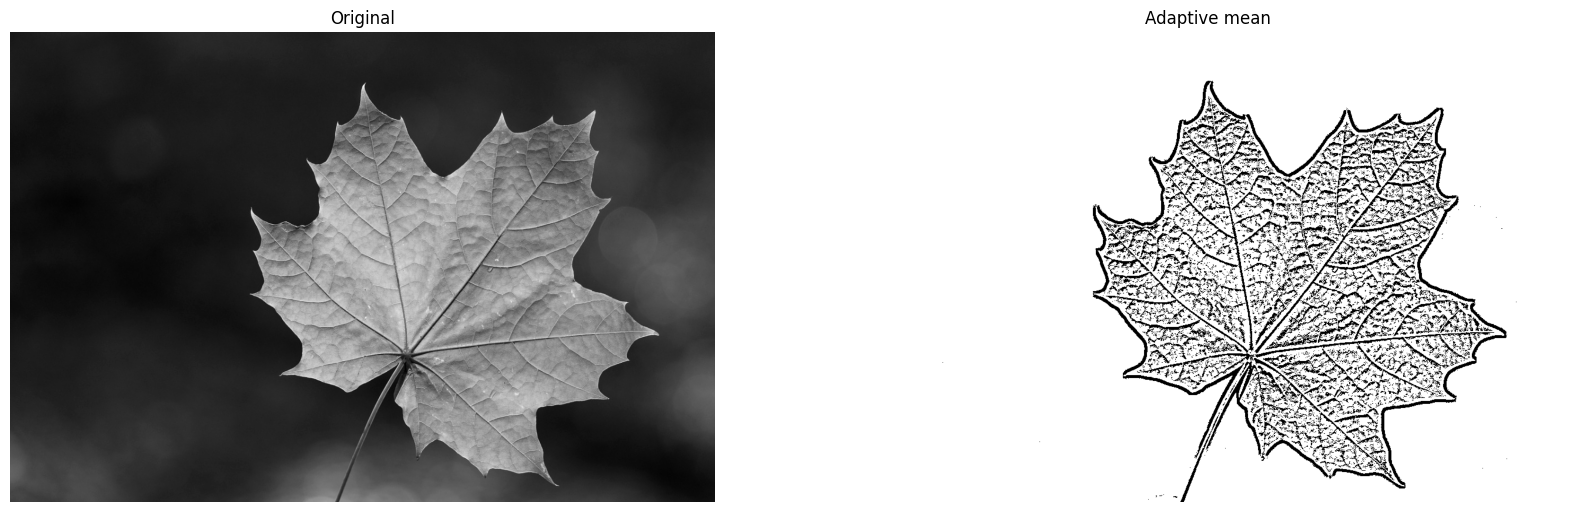

In [22]:
def adaptiveMean(img):
    thresh_img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize = 11,C = 5)
    return thresh_img

meanThresh = adaptiveMean(gray_img)
displayAll([gray_img,meanThresh],['Original','Adaptive mean'],2)

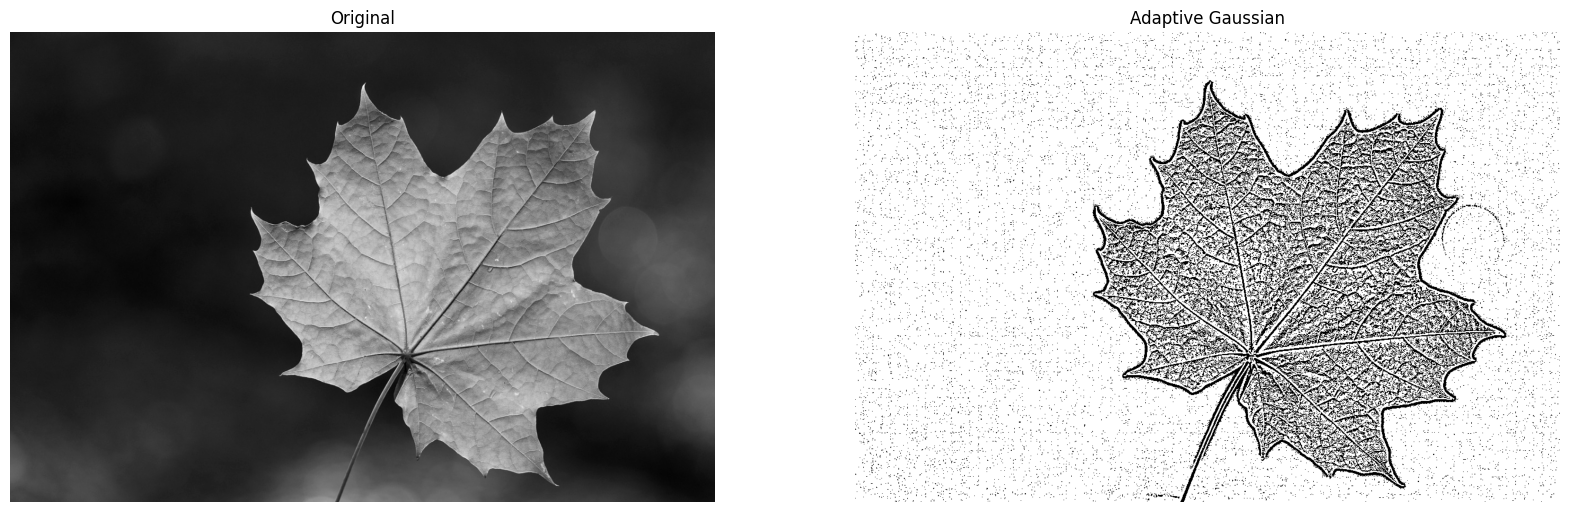

In [23]:
def adaptiveGaussian(img):
    thresh_img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize = 11,C = 2)
    return thresh_img

gaussianThresh = adaptiveGaussian(gray_img)
displayAll([gray_img,gaussianThresh],['Original','Adaptive Gaussian'],2)

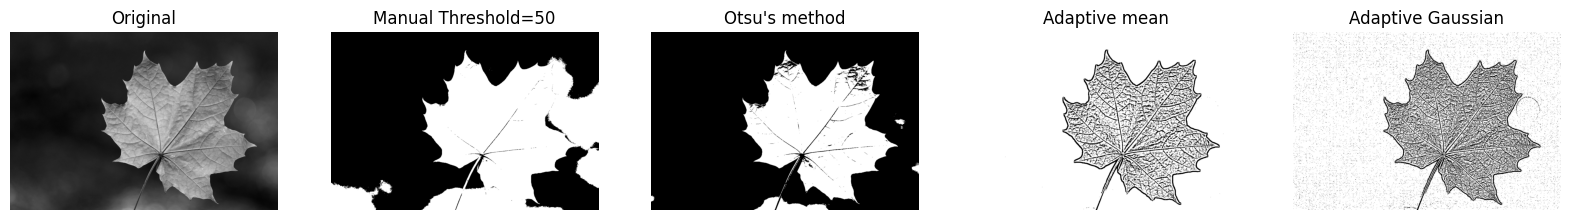

In [24]:
displayAll([gray_img,thresh_img1,res[1],meanThresh,gaussianThresh],['Original','Manual Threshold='+str(thresh),'Otsu\'s method','Adaptive mean','Adaptive Gaussian'],5)

**Inference**

 - Manual thresholding is considered the least favorable approach, as it relies on arbitrary values and can be quite inconsistent. Therefore, it is an unreliable method.

 - Otsu's method, on the other hand, determines the optimal global threshold by minimizing the intra-class variance between the foreground and background. While it performs better than manual thresholding, it is still not ideal compared to local thresholding techniques, which tend to offer more accurate results.

 - Adaptive mean thresholding computes the average intensity of a pixel's neighborhood and applies that to threshold the image. The size of the neighborhood is specified by the blockSize parameter, which in this case is set to 11. This method outperforms global thresholding techniques, especially when there are variations in contrast across the image. However, it is still more susceptible to noise than adaptive Gaussian thresholding.

 - Adaptive Gaussian thresholding, in contrast, uses a weighted sum of the neighborhood pixels, giving more importance to pixels closer to the center. This approach is less sensitive to noise compared to adaptive mean filtering and is more effective when there are gradual changes in contrast across the image.